# BUSINESS UNDERSTANDING

## OVERVIEW

The phrase "water is life" has been repeated many times. Water bodies aren't just beautiful additions to our planet's scenery; they also play a crucial role in our survival. Consequently, water is truly life. Water is important for domestic purposes, economic activities (such as production of electricity in the energy sector) and in health and hygiene. Recent data from the World Bank show that Tanzania has a population of about 60 million. According to Nsemwa (2022) many Tanzanians continue to struggle with insufficient or limited access to clean and safe water. Only 30.6% of Tanzanian households use recommended water treatment methods, and only 22.8% have adequate hand-washing facilities (Ministry of Health report, 2019). Poor sanitation is estimated to cause 432,000 diarrhea-related deaths per year and is a major contributor to several Neglected Tropical Diseases (NTDs) such as intestinal worms, schistosomiasis, and trachoma. Malnutrition is also made worse by poor sanitation (WHO, 2019).

## Problem Statement

Tanzania faces a very serious water shortage issue. Almost half of the population lacks access to clean water. After launching Tanzania's $6.5 billion Water Sector Development Program in 2006, and anticipating it ending in 2025, the Tanzanian government has prioritized water resources management and sanitation service delivery. Using data from the Tanzanian Ministry of Water, we will determine the condition of different water wells around the country to help them achieve their goal.

## Objective

The main objective of this study is to build a model that classifies the functional status of water wells in Tanzania. With this predictive model, the ministry can understand which water points are functional and non-functional, give useful information for future wells, and identify areas at risk of water shortage.

## Specific Objectives

To aid in improving maintenance operations by focusing inspections on the water points that have a high likelihood of requiring repair or having failed altogether

To provide 70%-75% accurate predictions on the functionality of wells

To determine if functionality varies by quantity.

To determine the functionality status concerning payment type


## Business Questions

What is the most popular water point type?

Does functionality vary by payment type?

Does altitude affect the class of extraction type?

## Expected Benefits to the Organization

It helps the investment of the Governnment on wells

This model can help the Tanzanian Government to find likely maintainance for needy wells.

We can use the Tanzanian Authorities how to use water sources in a productive way.

## Business Success Criteria

Improve the performance of the Tanzania water sector

## Project Success Criteria

Build a model that meets the following criteria:

Use machine learning models to correctly classify wells with an accuracy score of 70% - 75%

## Assessing the situation

The study managed to find data from Taarifa and Tanzanian Ministry of Water that deals on waterpoints throughout the country, to aid in the investigation.

Limitations of this study include the time consuming factor in some machine learning algorithms.


The resources to be used for this study include:

computers

Internet connectivity

Computer programming software

Jupyter notebook

Github

Jira

## Project Goals
Feed insightful information to the the Govermnent of Tanzania.


## project plan

Business Understanding
Data Understanding
Data Preparation
Exploratory Data Analysis
Data Preparation
Modeling




# Data Understanding
## Overview
Using the data we have, we will attempt to gain more insight on how to construct the best model that predicts how waterpoints in the focus region that is the country: Tanzania are designed.
In this phase of the investigation, the study inspected the data in an attempt to seek a deeper understanding about the data.

## Data Description
The target variable is ``status_group`` with the labels:
* functional - the waterpoint is operational and there are no repairs needed
* functional needs repair - the waterpoint is operational, but needs repairs
* non functional - the waterpoint is not operational

The predictor variables in this data include:
* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private -
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

In [464]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import scipy.stats

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [465]:
# Loading the training_set_values
training_data = pd.read_csv('data/training_set_values.csv')

# Loading the test set values
testing_data = pd.read_csv('data/test_set_values.csv')

# Loading the target column
training_labels = pd.read_csv('data/training_set_labels.csv')

# concatenating train and test data
#training_labels_df = pd.concat([training_data, training_labels],axis=1)

# merging the data sets
training_labels_df = training_data.merge(training_labels, how = "inner")

# previewing the data set
training_labels_df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0     3/14/2011         Roman        1390         Roman   
1   8776         0.0      3/6/2013       Grumeti        1399       GRUMETI   
2  34310        25.0     2/25/2013  Lottery Club         686  World vision   
3  67743         0.0     1/28/2013        Unicef         263        UNICEF   
4  19728         0.0     7/13/2011   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   
2          good        enough          enough                   dam   
3          good           dry             dry           machine dbh   
4          good      seasonal        seasonal  rainwater harvesting   

            source_type source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3              borehole  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

  waterpoint_type_group    status_group  
0    communal standpipe      functional  
1    communal standpipe      functional  
2    communal standpipe      functional  
3    communal standpipe  non functional  
4    communal standpipe      functional  

[5 rows x 41 columns]

In [466]:
# previewing the last five rows of the data
training_labels_df.tail()

id  amount_tsh date_recorded           funder  gps_height installer  \
59395  60739        10.0      5/3/2013  Germany Republi        1210       CES   
59396  27263      4700.0      5/7/2011      Cefa-njombe        1212      Cefa   
59397  37057         0.0     4/11/2011              NaN           0       NaN   
59398  31282         0.0      3/8/2011            Malec           0      Musa   
59399  26348         0.0     3/23/2011       World Bank         191     World   

       longitude  latitude             wpt_name  num_private  ...  \
59395  37.169807 -3.253847  Area Three Namba 27            0  ...   
59396  35.249991 -9.070629    Kwa Yahona Kuvala            0  ...   
59397  34.017087 -8.750434              Mashine            0  ...   
59398  35.861315 -6.378573               Mshoro            0  ...   
59399  38.104048 -6.747464      Kwa Mzee Lugawa            0  ...   

      water_quality quality_group      quantity  quantity_group        source  \
59395          soft          good        enough          enough        spring   
59396          soft          good        enough          enough         river   
59397      fluoride      fluoride        enough          enough   machine dbh   
59398          soft          good  insufficient    insufficient  shallow well   
59399         salty         salty        enough          enough  shallow well   

        source_type source_class     waterpoint_type waterpoint_type_group  \
59395        spring  groundwater  communal standpipe    communal standpipe   
59396    river/lake      surface  communal standpipe    communal standpipe   
59397      borehole  groundwater           hand pump             hand pump   
59398  shallow well  groundwater           hand pump             hand pump   
59399  shallow well  groundwater           hand pump             hand pump   

      status_group  
59395   functional  
59396   functional  
59397   functional  
59398   functional  
59399   functional  

[5 rows x 41 columns]

In [467]:
# getting the shape of the data
print(f" This data has {training_labels_df.shape[0]} rows and {training_labels_df.shape[1]} columns")

 This data has 59400 rows and 41 columns


### Preliminary Data Inspection

In [468]:
 # Getting the 'data' about the data
training_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [469]:
# Obtaining the summary descriptive statistics of the data
training_labels_df.describe().T

count          mean           std       min  \
id                 59400.0  37115.131768  21453.128371   0.00000   
amount_tsh         59400.0    317.650385   2997.574558   0.00000   
gps_height         59400.0    668.297239    693.116350 -90.00000   
longitude          59400.0     34.077427      6.567432   0.00000   
latitude           59400.0     -5.706033      2.946019 -11.64944   
num_private        59400.0      0.474141     12.236230   0.00000   
region_code        59400.0     15.297003     17.587406   1.00000   
district_code      59400.0      5.629747      9.633649   0.00000   
population         59400.0    179.909983    471.482176   0.00000   
construction_year  59400.0   1300.652475    951.620547   0.00000   

                            25%           50%           75%           max  
id                 18519.750000  37061.500000  55656.500000  7.424700e+04  
amount_tsh             0.000000      0.000000     20.000000  3.500000e+05  
gps_height             0.000000    369.000000   1319.250000  2.770000e+03  
longitude             33.090347     34.908743     37.178387  4.034519e+01  
latitude              -8.540621     -5.021597     -3.326156 -2.000000e-08  
num_private            0.000000      0.000000      0.000000  1.776000e+03  
region_code            5.000000     12.000000     17.000000  9.900000e+01  
district_code          2.000000      3.000000      5.000000  8.000000e+01  
population             0.000000     25.000000    215.000000  3.050000e+04  
construction_year      0.000000   1986.000000   2004.000000  2.013000e+03

#### Observations
``region_code`` and ``district_code`` seem like they should be categorical features.

``construction_year`` should be casted as a datetime object.

``id`` should be casted to object.

``longitude`` and ``latitude`` look fine.

``gps_height``, ``amount_tsh`` and ``population`` also look fine.

In [470]:
# Getting the data types of the data
training_labels_df.dtypes.value_counts()

object     31
int64       7
float64     3
dtype: int64

There are 10 numeric features in the data and 31 string features in the data. 

In [471]:
# getting the value counts of num_private
training_labels_df.num_private.value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [472]:
# getting the value counts of manegement
training_labels_df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [473]:
# getting the value counts of management_group
training_labels_df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [474]:
# getting the value counts of scheme_management
training_labels_df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [475]:
# Getting the value counts of scheme_name
training_labels_df.scheme_name.value_counts()

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
                              ... 
Lunguo water supply              1
Namtibwili                       1
Mtumbei mpopera                  1
Sasaka village water supply      1
Mondoros water scheme            1
Name: scheme_name, Length: 2696, dtype: int64

In [476]:
# # getting the value counts of payment_type
training_labels_df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [477]:
# getting the value counts of payment
training_labels_df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [478]:
# Getting the value counts of source
training_labels_df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [479]:
# # getting the value counts of source_class
training_labels_df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [480]:
repetitive_and_unuseful = ['date_recorded', 'num_private', 'wpt_name', 'construction_year',
                     'subvillage', 'region_code', 'district_code', 'lga',
                     'ward', 'public_meeting', 'recorded_by', 'scheme_management',
                     'scheme_name', 'extraction_type', 'extraction_type_group', 
                      'water_quality', 'source','source_type', 'waterpoint_type_group',
                     'payment_type', 'management', 'id', 'quantity_group']

In [481]:
print(f" There are {repetitive_and_unuseful.__len__()} columns that we do no need in the data")

 There are 23 columns that we do no need in the data


After going through the variable description of the data and performing the preliminary data inspection,
the study has proposed that the columns categorized as **repetitive_and_unuseful** be dropped on the basis that some provide similar information and some do not provide any relevant information, such as ``public_meeting`` and ``num_private``.

# Data Preparation
## Overview
It is vital for data to be prepared before being staged for modelling to enhance the model's efficiency and prevent the generation of misleading knowledge.
In this phase of the investigation, the study will look at missing values, duplicated entries, inconsistencies and invalid data.

In [482]:
# dropping irrelevant columns
data = training_labels_df.drop(repetitive_and_unuseful, axis=1)

# previewing the new data
data.head()

amount_tsh        funder  gps_height     installer  longitude   latitude  \
0      6000.0         Roman        1390         Roman  34.938093  -9.856322   
1         0.0       Grumeti        1399       GRUMETI  34.698766  -2.147466   
2        25.0  Lottery Club         686  World vision  37.460664  -3.821329   
3         0.0        Unicef         263        UNICEF  38.486161 -11.155298   
4         0.0   Action In A           0       Artisan  31.130847  -1.825359   

                     basin   region  population permit extraction_type_class  \
0               Lake Nyasa   Iringa         109  False               gravity   
1            Lake Victoria     Mara         280   True               gravity   
2                  Pangani  Manyara         250   True               gravity   
3  Ruvuma / Southern Coast   Mtwara          58   True           submersible   
4            Lake Victoria   Kagera           0   True               gravity   

  management_group         payment quality_group      quantity source_class  \
0       user-group    pay annually          good        enough  groundwater   
1       user-group       never pay          good  insufficient      surface   
2       user-group  pay per bucket          good        enough      surface   
3       user-group       never pay          good           dry  groundwater   
4            other       never pay          good      seasonal      surface   

               waterpoint_type    status_group  
0           communal standpipe      functional  
1           communal standpipe      functional  
2  communal standpipe multiple      functional  
3  communal standpipe multiple  non functional  
4           communal standpipe      functional

In [483]:
# getting the shape of the new data
print(f"The new data has {data.shape[0]} rows and {data.shape[1]} columns")

The new data has 59400 rows and 18 columns


The **repetitive_columns** were successfully dropped.

## Data Cleaning

### Checking for and handling duplicates

In [484]:
# Checking for duplicated entries
data[['latitude', 'longitude']].duplicated().sum()

1880

The data has 1880 ducplicated rows. 

In [485]:
data = data.drop_duplicates(subset = ["latitude", "longitude"])

# checking for duplicates once more
data[['latitude', 'longitude']].duplicated().sum()

0

The data set does not have missing values anymore.

### Checking for and handling Missing values

In [486]:
# checking for missing values
data.isna().sum()

amount_tsh                  0
funder                   3609
gps_height                  0
installer                3623
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
permit                   3043
extraction_type_class       0
management_group            0
payment                     0
quality_group               0
quantity                    0
source_class                0
waterpoint_type             0
status_group                0
dtype: int64

In [487]:
#checking for the percentage of missing values of data points in each column
percentages = (data.isna().sum() / len(data)) * 100
percentages.sort_values(ascending=False)

installer                6.298679
funder                   6.274339
permit                   5.290334
status_group             0.000000
region                   0.000000
gps_height               0.000000
longitude                0.000000
latitude                 0.000000
basin                    0.000000
population               0.000000
waterpoint_type          0.000000
extraction_type_class    0.000000
management_group         0.000000
payment                  0.000000
quality_group            0.000000
quantity                 0.000000
source_class             0.000000
amount_tsh               0.000000
dtype: float64

The columns ``funder``, ``installer`` and ``permit`` are the only features with missing values. In addition, the percentage of entries classified as missing values in ``funder`` and ``installer`` are small enough for us to drop those entries without sacrificing a big chunk of our data.

In [488]:
# Having a glimpe of the feature funder
for col in ['funder', 'installer', 'permit']:
    print(f"For column {col}:")
    print(f"There are {data[col].nunique()} unique values in this column")
    print("------------------")

For column funder:
There are 1858 unique values in this column
------------------
For column installer:
There are 2113 unique values in this column
------------------
For column permit:
There are 2 unique values in this column
------------------


In [489]:
# creating an array of densities to impute missing values for permit
densities = list(data.permit.value_counts(normalize=True))

# previewing densities
densities

[0.6985516823613636, 0.3014483176386365]

In [490]:
#setting seed for reproducibility
np.random.seed(0)

# Defining a function to fill missing values for permit
def impute_missing(value):
    '''A function that fills missing values for permit'''
    if value not in [0,1]:
        return np.random.choice([0,1], p=densities)
    else:
        return value
    
# Applying the function to the column permit    
data['permit'] = data['permit'].map(lambda x: impute_missing(x))

# #previewing the columns to check for missing values
for col in ['funder', 'installer', 'permit']:
    print('For', col,':')
    print('The densities are:', data[col].value_counts(normalize=True).\
        sort_values(ascending=False).head())
    print("Number of missing values are : {}".format(data[col].isna().sum()))
    print("-----------------------------")

For funder :
The densities are: Government Of Tanzania    0.163863
Danida                    0.057762
Hesawa                    0.035503
World Bank                0.024949
Kkkt                      0.023873
Name: funder, dtype: float64
Number of missing values are : 3609
-----------------------------
For installer :
The densities are: DWE           0.301520
Government    0.030985
RWE           0.021652
Commu         0.019667
DANIDA        0.019482
Name: installer, dtype: float64
Number of missing values are : 3623
-----------------------------
For permit :
The densities are: True     0.678025
False    0.321975
Name: permit, dtype: float64
Number of missing values are : 0
-----------------------------


The missing values from ``permit`` have been imputed successfully using a user-defined function based on the probability densities of the feature. But the columns ``installer`` and ``funder`` still have missing values due to the fact that they are string values and the study thought it wise to remove those entries.

In [491]:
# Dropping missing values from  installer and funder along the rows
data.dropna(axis=0, inplace=True)

# Checking once more for missing values
data.isna().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
extraction_type_class    0
management_group         0
payment                  0
quality_group            0
quantity                 0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

There are no more missing values in the data.

Outliers were not considered for this study because all the values in the numeric columns were thought of as important.

### Type casting invalid data formats to correct formats

In [492]:
# Type casting some string objects to categorical 
for col in ['basin', 'region', 'extraction_type_class', 'management_group',
            'payment', 'quality_group', 'quantity', 'source_class',
            'waterpoint_type', 'status_group']:
    data[col] = data[col].astype('category')
data.dtypes

amount_tsh                float64
funder                     object
gps_height                  int64
installer                  object
longitude                 float64
latitude                  float64
basin                    category
region                   category
population                  int64
permit                     object
extraction_type_class    category
management_group         category
payment                  category
quality_group            category
quantity                 category
source_class             category
waterpoint_type          category
status_group             category
dtype: object

In [493]:
# checking the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53844 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             53844 non-null  float64 
 1   funder                 53844 non-null  object  
 2   gps_height             53844 non-null  int64   
 3   installer              53844 non-null  object  
 4   longitude              53844 non-null  float64 
 5   latitude               53844 non-null  float64 
 6   basin                  53844 non-null  category
 7   region                 53844 non-null  category
 8   population             53844 non-null  int64   
 9   permit                 53844 non-null  object  
 10  extraction_type_class  53844 non-null  category
 11  management_group       53844 non-null  category
 12  payment                53844 non-null  category
 13  quality_group          53844 non-null  category
 14  quantity               53844 non-null 

In [494]:
# Saving cleaned data set for later use
data.to_csv('./Data/cleaned_data.csv')

In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53844 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             53844 non-null  float64 
 1   funder                 53844 non-null  object  
 2   gps_height             53844 non-null  int64   
 3   installer              53844 non-null  object  
 4   longitude              53844 non-null  float64 
 5   latitude               53844 non-null  float64 
 6   basin                  53844 non-null  category
 7   region                 53844 non-null  category
 8   population             53844 non-null  int64   
 9   permit                 53844 non-null  object  
 10  extraction_type_class  53844 non-null  category
 11  management_group       53844 non-null  category
 12  payment                53844 non-null  category
 13  quality_group          53844 non-null  category
 14  quantity               53844 non-null 

# Exploratory Data Analysis
In this phase of the investigation, the study will look at the trends, patterns using visualizations and statistics to show the relationships between the variables within the data.

## Univariate Analysis

Feature ``amount_tsh``

In [ ]:
# Summary statistics of amount_tsh
data.amount_tsh.describe().T

count     55692.000000
mean        327.517002
std        2708.165477
min           0.000000
25%           0.000000
50%           0.000000
75%          30.000000
max      250000.000000
Name: amount_tsh, dtype: float64

Text(0.5, 0.98, 'The distribution of amount_tsh')

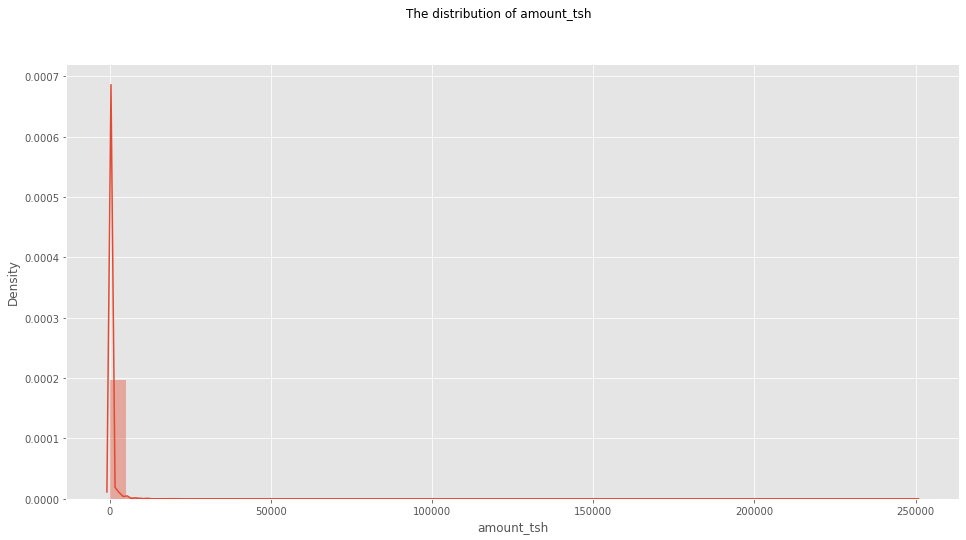

In [ ]:
# The distribution of amount_tsh
plt.figure(figsize=(16,8))
sns.distplot(data.amount_tsh)
plt.suptitle("The distribution of amount_tsh")

#### Observations:
The feature ``amount_tsh`` does not seem to be normally distributed. This will be dealt with during the preprocessing phase.

### Feature ``funder``

In [ ]:
# What is the type of the variable funder
data.funder.dtype

dtype('O')

In [ ]:
print(f"There are {data.funder.nunique()} unique values of funder")

There are 1884 unique values of funder


In [ ]:
# creating a function that returns a dictionary of value counts
def info_dict(data, col):
    """A function that zips the values and value_counts of string objects
    and returns the top 20"""
    name = list(data[col].value_counts().index[:20])
    val = list(data[col].value_counts().values[:20])
    info = dict(zip(name, val))
    return info

In [ ]:
print("The top 20 funders of wells in this data are:")
print("name: ,  number of wells:")
info_dict(data, 'funder')

The top 20 funders of wells in this data are:
name: ,  number of wells:


{'Government Of Tanzania': 9080,
 'Danida': 3114,
 'Hesawa': 2197,
 'Rwssp': 1373,
 'World Bank': 1338,
 'Kkkt': 1287,
 'World Vision': 1239,
 'Unicef': 1057,
 'Tasaf': 876,
 'District Council': 842,
 'Dhv': 829,
 'Private Individual': 826,
 'Dwsp': 811,
 '0': 777,
 'Norad': 764,
 'Germany Republi': 610,
 'Tcrs': 601,
 'Ministry Of Water': 586,
 'Water': 583,
 'Dwe': 484}

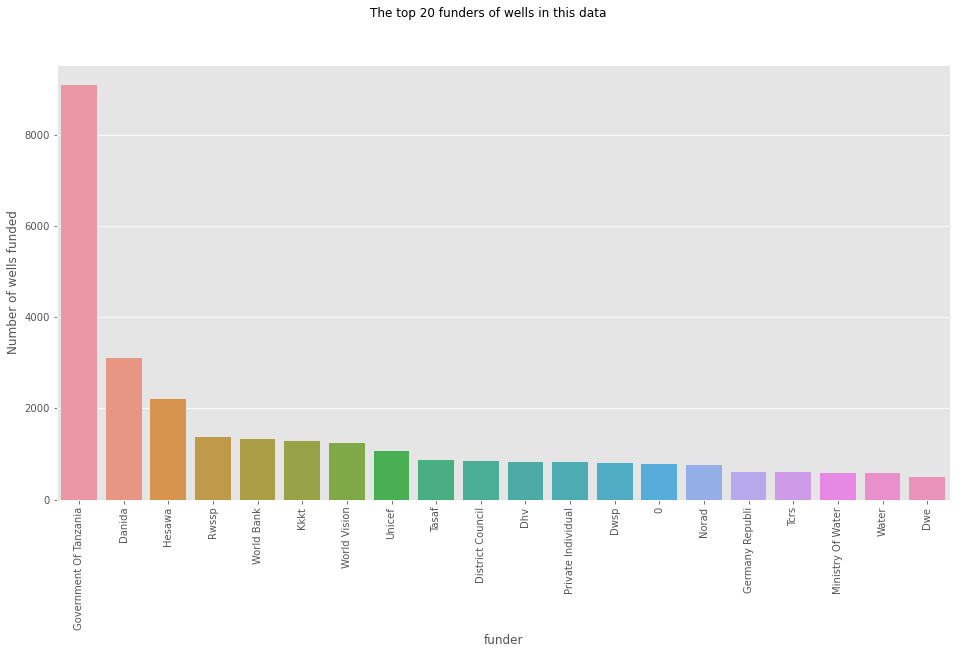

In [ ]:
# creating a variable to stor the top 20 funders
top_20_funders = info_dict(data, 'funder')
# plotting the top 20 funders:
plt.figure(figsize=(16,8))
sns.barplot(data['funder'].value_counts().index[:20], data['funder'].value_counts().values[:20])
plt.suptitle("The top 20 funders of wells in this data")
plt.ylabel("Number of wells funded")
plt.xlabel("funder")
plt.xticks(rotation=90)
plt.show()

#### Observations:
The top 5 funders are:
* Government of Tanzania
* Danida
* Hesawa
* Rwssp
* World Bank

### Feature ``gps_height``

In [ ]:
# summary statistics of height in metres
data.gps_height.describe().T

count    55692.000000
mean       677.465668
std        691.371005
min        -90.000000
25%          0.000000
50%        393.000000
75%       1316.000000
max       2770.000000
Name: gps_height, dtype: float64

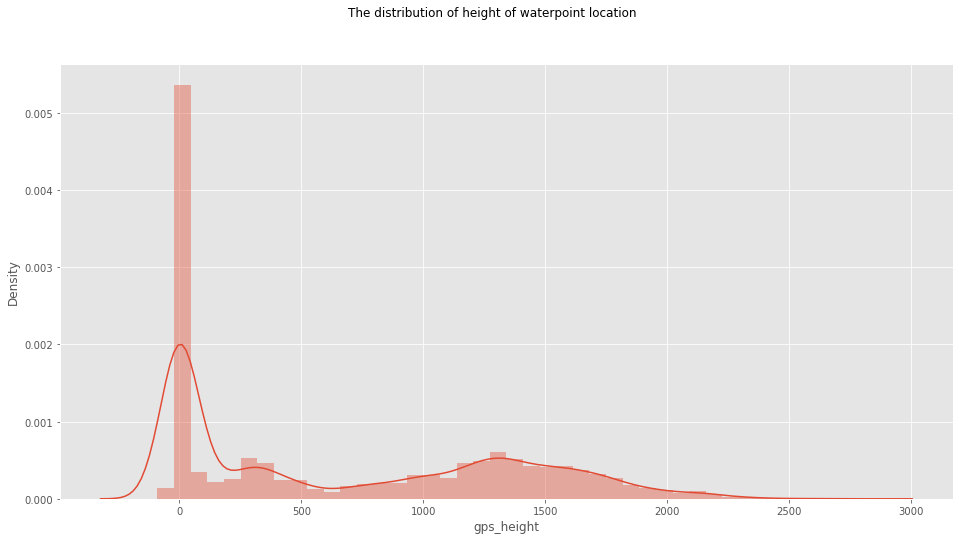

In [ ]:
# plotting the distribution of gps_height
plt.figure(figsize=(16,8))
sns.distplot(data.gps_height)
plt.suptitle("The distribution of height of waterpoint location")
plt.show()

#### Observations:
The distribution of `gps_height` does not seem to be normally distributed. This will be dealt with later on

### Feature `installer`

In [ ]:
# What is the type of the variable funder
data.installer.dtype

dtype('O')

In [ ]:
print(f"There are {data.installer.nunique()} unique values of funder")

There are 2139 unique values of funder


In [ ]:
# Applying the info_dict function to get a dictionary of value counts and values
print("The top 20 installers of wells in this data are:")
print("name: ,  number of wells:")
info_dict(data, 'installer')

The top 20 installers of wells in this data are:
name: ,  number of wells:


{'DWE': 17390,
 'Government': 1825,
 'RWE': 1206,
 'Commu': 1060,
 'DANIDA': 1050,
 'KKKT': 898,
 'Hesawa': 840,
 '0': 777,
 'TCRS': 707,
 'Central government': 622,
 'CES': 610,
 'Community': 553,
 'DANID': 552,
 'District Council': 551,
 'HESAWA': 538,
 'LGA': 408,
 'World vision': 408,
 'WEDECO': 397,
 'TASAF': 396,
 'District council': 392}

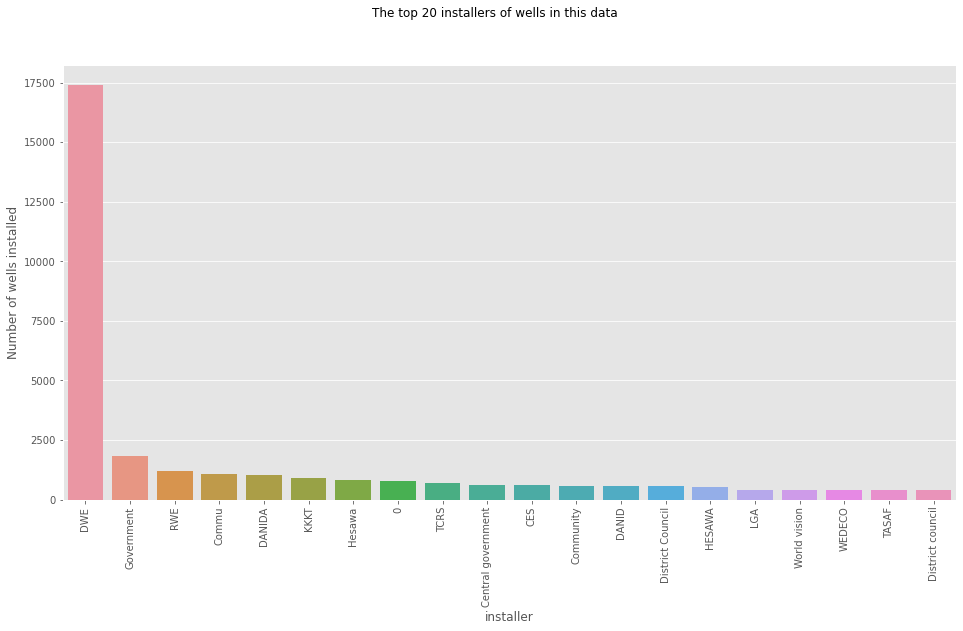

In [ ]:
# creating a variable to stor the top 20 funders
top_20_funders = info_dict(data, 'funder')
# plotting the top 20 funders:
plt.figure(figsize=(16,8))
sns.barplot(data['installer'].value_counts().index[:20], data['installer'].value_counts().values[:20])
plt.suptitle("The top 20 installers of wells in this data")
plt.ylabel("Number of wells installed")
plt.xlabel("installer")
plt.xticks(rotation=90)
plt.show()

The top 5 installers of wells are:
* DWE
* Government
* RWE
* Commu
* DANIDA

It is quite interesting that both DANIDA and Government make an appearance on the list of top 5 funders and top 5 installers.

### Feature ``extraction_type_class``


In [ ]:
#getting the value counts
data['extraction_type_class'].value_counts()

gravity         24677
handpump        15943
other            5999
submersible      5816
motorpump        2697
rope pump         448
wind-powered      112
Name: extraction_type_class, dtype: int64

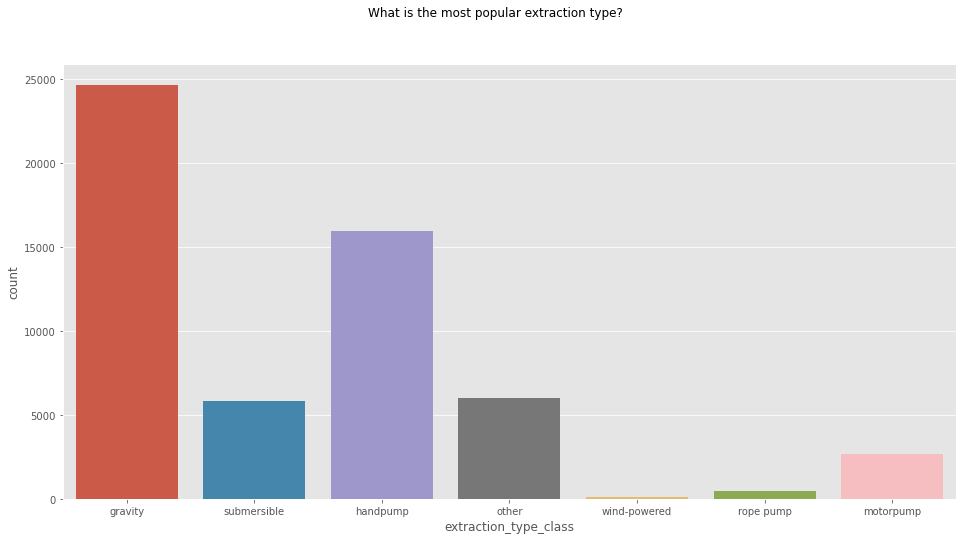

In [ ]:
#analysing extraction type class  column
plt.figure(figsize=(16,8))
sns.countplot(x='extraction_type_class', data=data)
plt.suptitle("What is the most popular extraction type?")
plt.show()

#### Observations:
Gravity seems to be the most popular extraction type, followed by handpump and submersible. 

The least popular is wind powered 

### Feature `waterpoint_type`

In [ ]:
# These are the types of waterpoint:
data['waterpoint_type'].value_counts()

communal standpipe             25759
hand pump                      16965
communal standpipe multiple     6062
other                           6048
improved spring                  742
cattle trough                    109
dam                                7
Name: waterpoint_type, dtype: int64

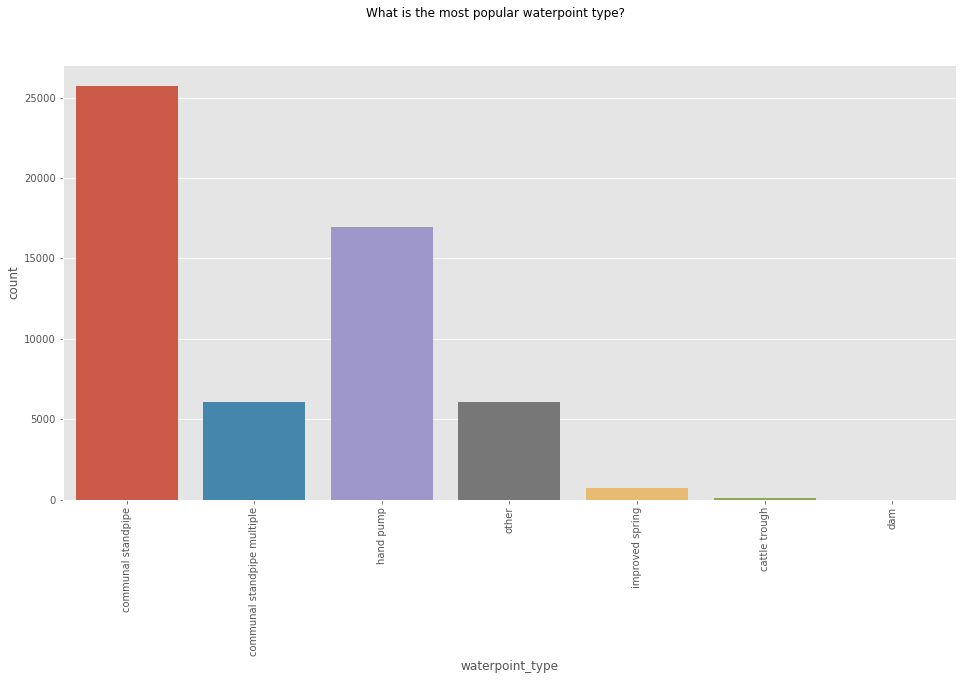

In [ ]:
# plotting the most popular waterpoint type
plt.figure(figsize=(16,8))
sns.countplot(x='waterpoint_type', data=data)
plt.suptitle("What is the most popular waterpoint type?")
plt.xticks(rotation=90)
plt.show()

#### Observations:
The most featured waterpoint type is communal standpipe followed by handpump. The least featured is dam.

### Feature ``payment``

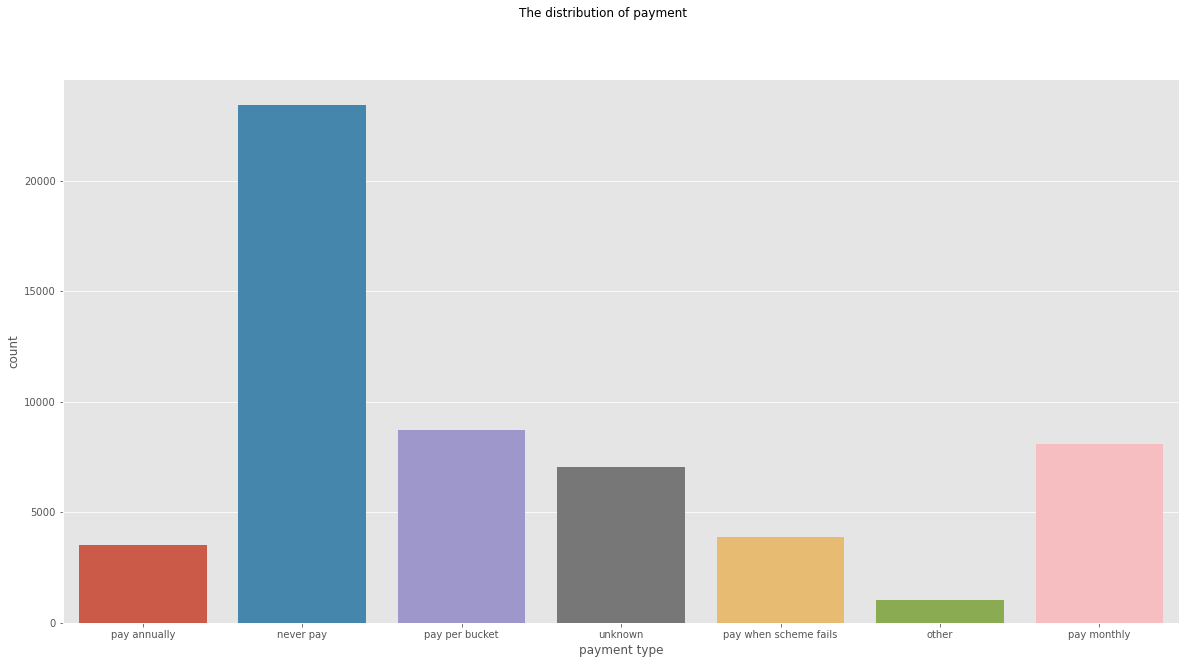

In [ ]:
#plotting the variable payment
plt.figure(figsize=(20,10))
sns.countplot(x='payment', data=data)
plt.suptitle("The distribution of payment")
plt.xlabel('payment type')
plt.show()

#### Observations
Wells that are not payed for feature the most in this data, followed by pay per bucket, unknown and pay monthly.

The least occuring are pay annually, pay when scheme fails and other.

### Feature ``quality_group``

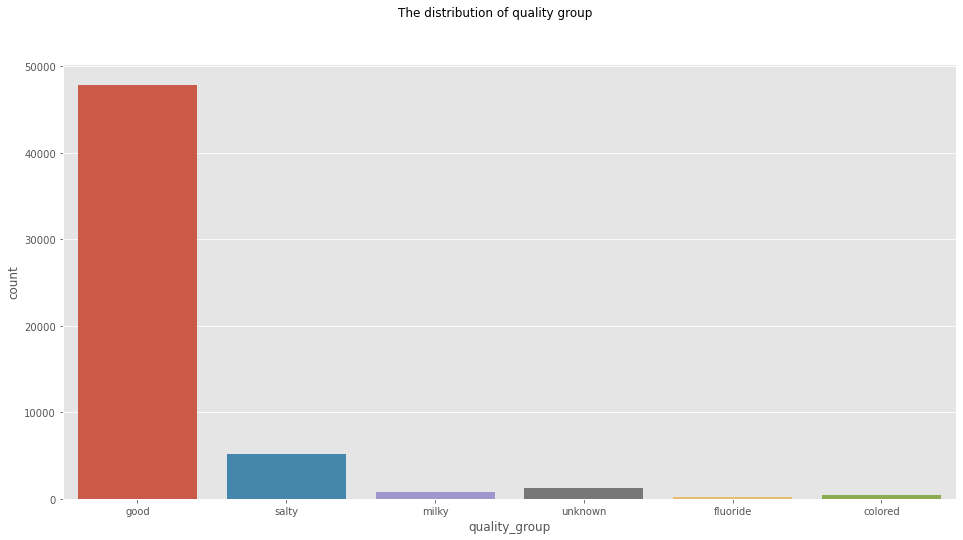

In [ ]:
# plotting the distribution of quality group
plt.figure(figsize=(16,8))
sns.countplot(x='quality_group', data=data)
plt.suptitle("The distribution of quality group")
plt.show()

#### Observations:
The most featured quality group is good followed by salty and the least is fluoride.

### Feature ``basin``

In [ ]:
# Count of number of wells per basin
basin_dict = dict(zip(list(data.basin.value_counts().index),
                       list(data.basin.value_counts().values)))
basin_dict

{'Lake Victoria': 10047,
 'Pangani': 8812,
 'Rufiji': 7196,
 'Internal': 6588,
 'Lake Tanganyika': 6400,
 'Wami / Ruvu': 5949,
 'Ruvuma / Southern Coast': 4482,
 'Lake Nyasa': 3768,
 'Lake Rukwa': 2450}

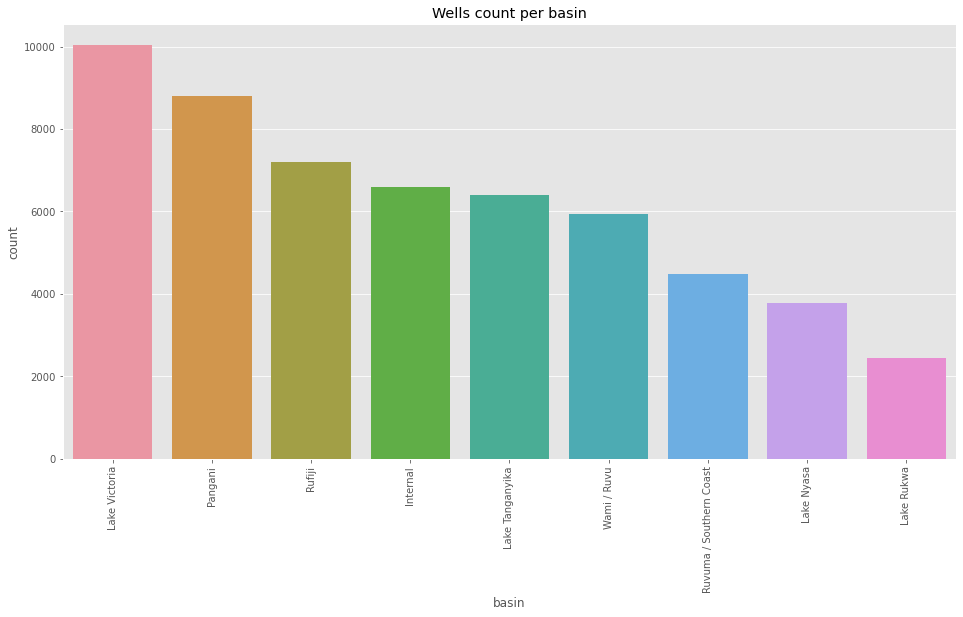

In [ ]:
# Analysing basin column
plt.figure(figsize=(16,8))
sns.countplot(x =data.basin,
              order = data['basin'].value_counts().index).set(title="Wells count per basin")
plt.xticks(rotation=90);

#### Observations:
Most wells are located near the Lake Victoria basin, whereas the Lake Rukwa basin has the lowest number of wells

### Feature ``region``

In [ ]:
# Count of number of wells per region
region_dict = dict(zip(list(data.region.value_counts().index),
                       list(data.region.value_counts().values)))
region_dict

{'Iringa': 5284,
 'Shinyanga': 4933,
 'Kilimanjaro': 4373,
 'Morogoro': 3994,
 'Kagera': 3206,
 'Mwanza': 3049,
 'Arusha': 3024,
 'Kigoma': 2805,
 'Mbeya': 2703,
 'Ruvuma': 2638,
 'Tanga': 2546,
 'Pwani': 2497,
 'Dodoma': 2196,
 'Mara': 1953,
 'Tabora': 1940,
 'Rukwa': 1803,
 'Mtwara': 1725,
 'Manyara': 1580,
 'Lindi': 1542,
 'Singida': 1124,
 'Dar es Salaam': 777}

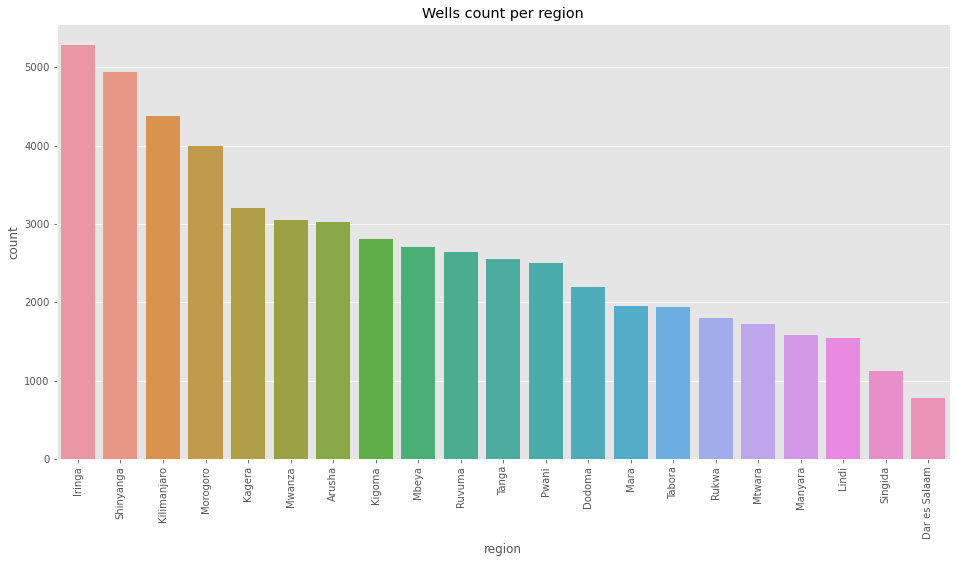

In [ ]:
# Analysing region column
plt.figure(figsize=(16,8))
sns.countplot(x = data.region,
              order = data['region'].value_counts().index).set(title="Wells count per region")
plt.xticks(rotation=90);

#### Observations:
From the analysis, ``Iringa region`` has the greatest number of wells, while ``Dar es Salaam`` has the least number.

### Feature ``permit``

In [ ]:
# Count of number of wells per permit
permit_dict = dict(zip(list(data.permit.value_counts().index),
                       list(data.permit.value_counts().values)))
permit_dict

{True: 38358, False: 17334}

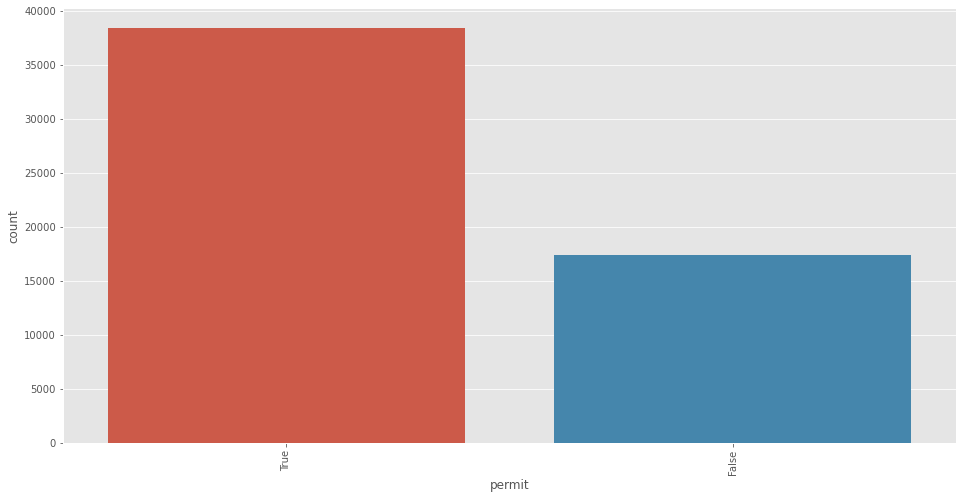

In [ ]:
# Analysing permit column
plt.figure(figsize=(16,8))
sns.countplot(x = data.permit,
              order = data['permit'].value_counts().index)
plt.xticks(rotation=90);

#### Observations
According to the visualisation, most waterpoints have been granted permission to exist

### Feature ``population``

In [ ]:
summary_statistics = data['population'].describe()
print("Total number of people around the wells is",summary_statistics[0])
print("\n")
print("The average number of people living around the wells is",summary_statistics[1])
print("\n")
print("The minimum population value is",summary_statistics[3])
print("\n")
print("The maximum population value is",summary_statistics[7])

Total number of people around the wells is 55692.0


The average number of people living around the wells is 186.7374129138835


The minimum population value is 0.0


The maximum population value is 30500.0


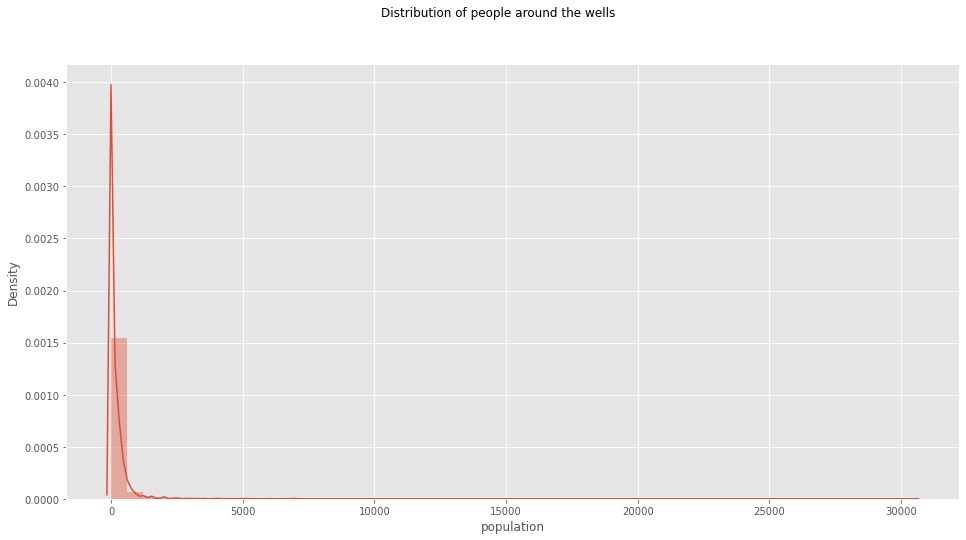

In [ ]:
# plotting the distribution of population
plt.figure(figsize=(16,8))
sns.distplot(data["population"])
plt.suptitle("Distribution of people around the wells");

#### Observations
The number of people around the wells are not normally distributed.

### Feature ``management_group``

In [ ]:
# Look at the unique values and their count
data.management_group.value_counts()

user-group    49088
commercial     3534
parastatal     1616
other           930
unknown         524
Name: management_group, dtype: int64

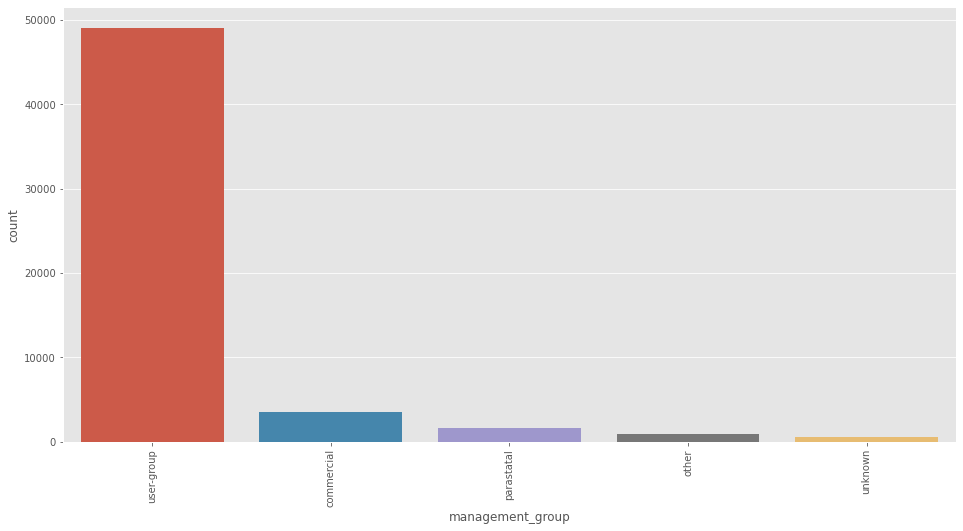

In [ ]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'management_group', data=data, 
              order=data.management_group.value_counts()\
               .index).set_xticklabels(data.management_group.value_counts()\
               .index, rotation=90);

#### Obsevation
Majority of water wells are managed by user groups while water wells with unkown management are the least

### Feature ``payment``

In [ ]:
# Look at the unique values and their count
data.payment.value_counts()

never pay                23413
pay per bucket            8708
pay monthly               8082
unknown                   7056
pay when scheme fails     3867
pay annually              3529
other                     1037
Name: payment, dtype: int64

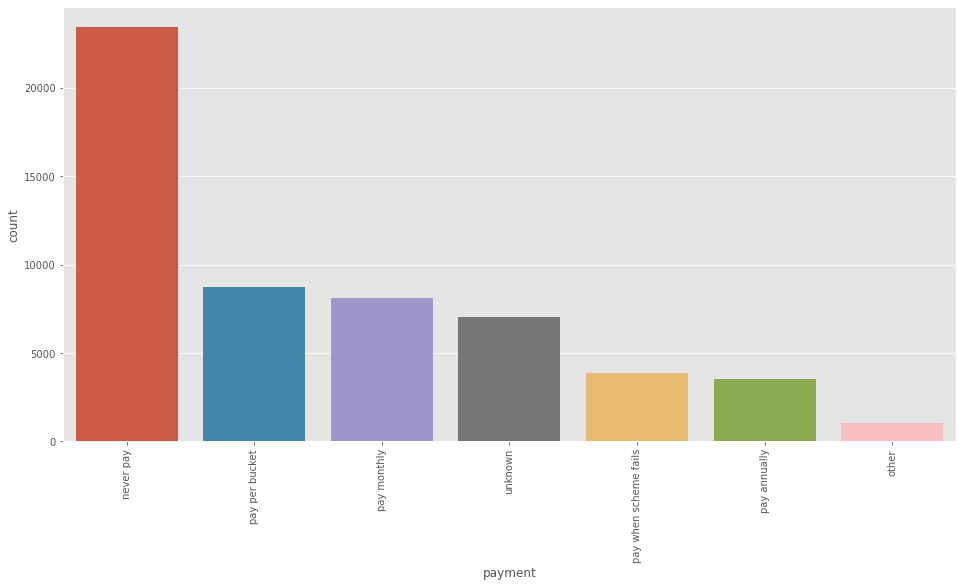

In [ ]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'payment', data= data, order=data.payment.value_counts()
               .index).set_xticklabels(data.payment.value_counts()
               .index, rotation=90);

#### Observation
Majority of the water gotten from the water well is never paid for 

### Feature ``quality_group``

In [ ]:
# Look at the unique values and their count
data.quality_group.value_counts()

good        47900
salty        5130
unknown      1293
milky         785
colored       391
fluoride      193
Name: quality_group, dtype: int64

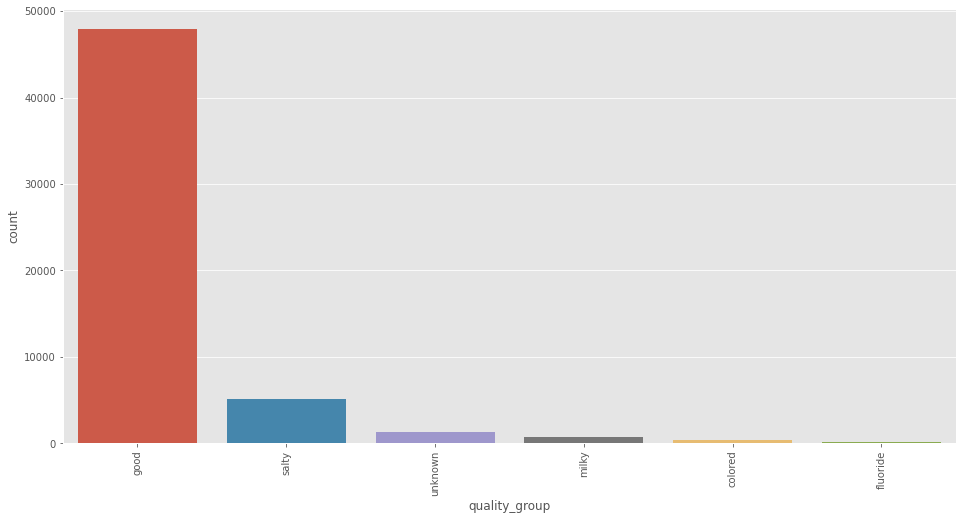

In [ ]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'quality_group', data= data, order=data.quality_group.value_counts()
               .index).set_xticklabels(data.quality_group.value_counts()
               .index, rotation=90);

#### Observation
Majority of the water wells produce good quality water with wells which produce water with fluride are the least

### Feature ``quantity``

In [ ]:
# Look at the unique values and their count
data.quantity.value_counts()

enough          31931
insufficient    13933
dry              5778
seasonal         3409
unknown           641
Name: quantity, dtype: int64

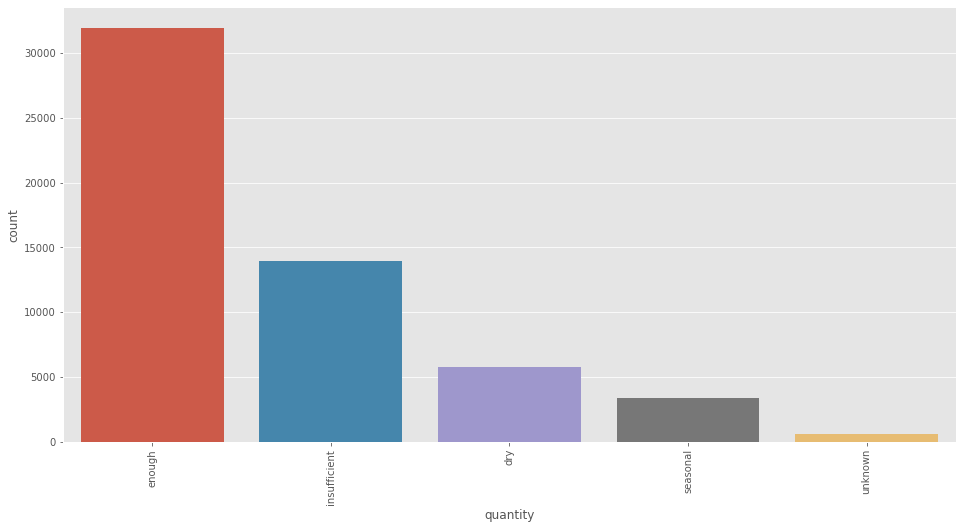

In [ ]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'quantity', data= data, order=data.quantity.value_counts()
               .index).set_xticklabels(data.quantity.value_counts()
               .index, rotation=90);

#### Observation
Majority of water wells have enough water with water wells with insufficient water being second. Waterpoints with an unknown quantity of water are the least

### Feature ``source_class``

In [ ]:
# Look at the unique values and their count
data.source_class.value_counts()

groundwater    43234
surface        12209
unknown          249
Name: source_class, dtype: int64

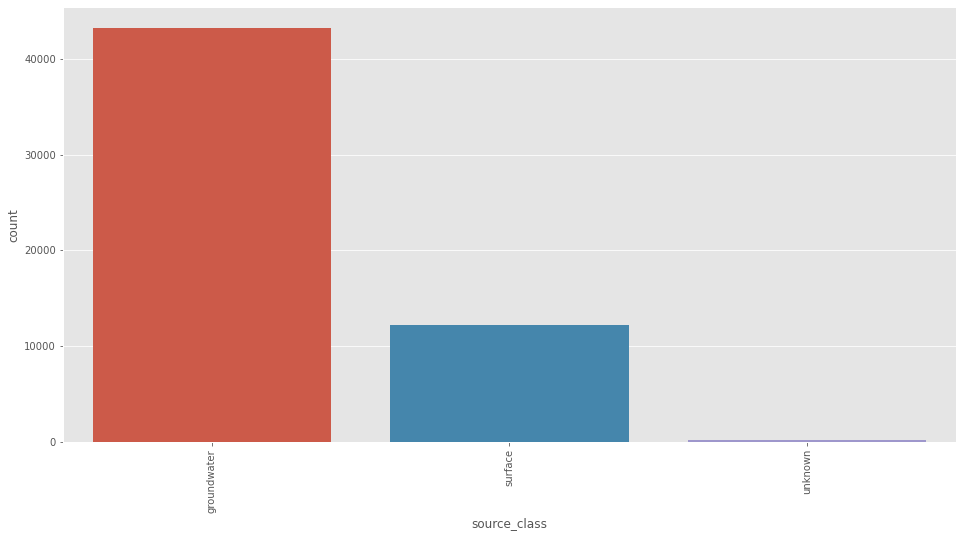

In [ ]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'source_class', data= data, order=data.source_class.value_counts()
               .index).set_xticklabels(data.source_class.value_counts()
               .index, rotation=90);

#### Observation
Most waterpoints get their water from ground water sources according to the data

## Bivariate Analysis

### What is the relationship between ``amount_tsh`` and ``status_group``

Text(0.5, 0.98, 'Total static head vs status group')

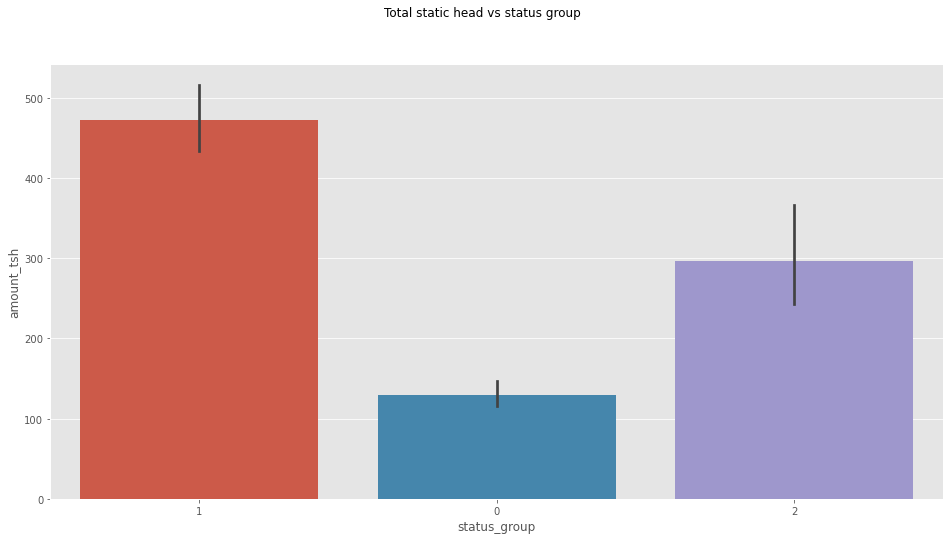

In [ ]:
# plotting the distribution of amount by status group
plt.figure(figsize=(16,8))
sns.barplot(x='status_group', y ='amount_tsh',
                data=data)
plt.suptitle("Total static head vs status group")

### Observations:
Functional water points have the highest amount of water available followed by those that are functional but need repair.

Non functional water points had the least amount of water available

### What is the relationship between ``gps_height`` and ``status_group``?

Text(0.5, 0.98, 'Height vs status group')

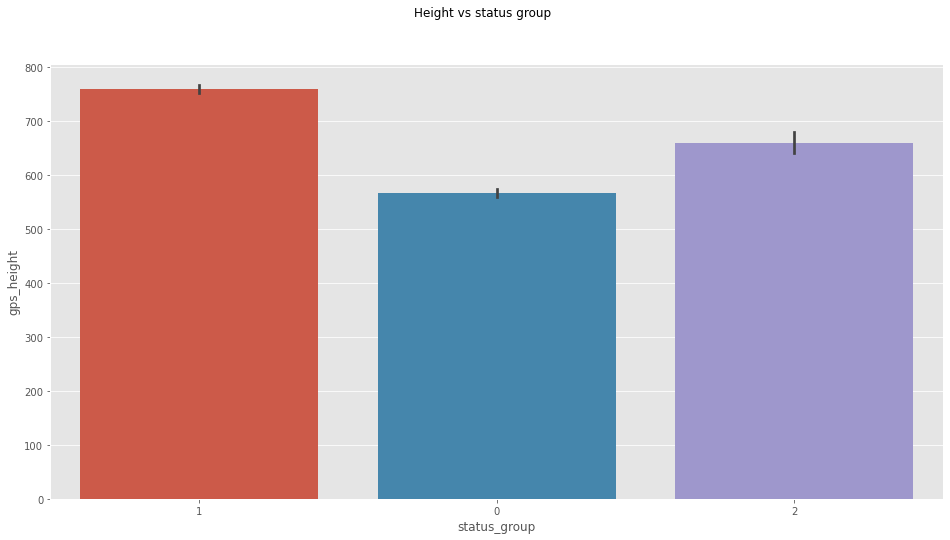

In [ ]:
# Plotting the relationship between gps_height and status_group
plt.figure(figsize=(16,8))
sns.barplot(x='status_group', y ='gps_height',
                data=data)
plt.suptitle("Height vs status group")

#### Observations:
Functional waterpoints are generally located at higher altitudes than the rest.

### What is the relationship between ``waterpoint_type`` and ``status_group``?


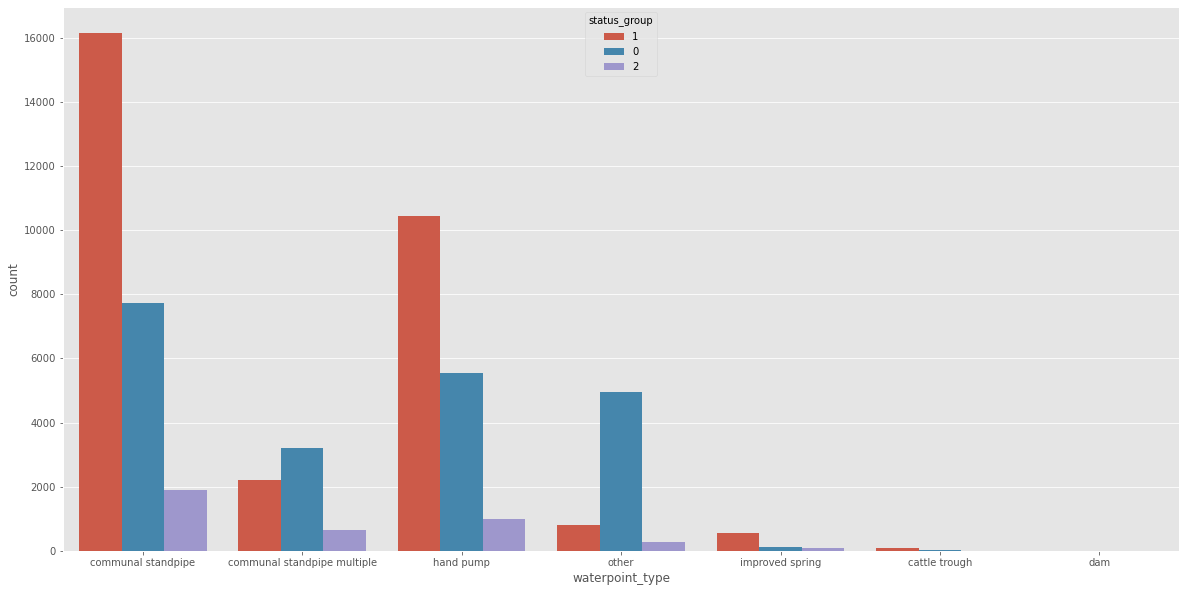

In [ ]:
#comparing the water point type with the target varible.
plt.figure(figsize=(20,10))
sns.countplot(x='waterpoint_type', hue="status_group", data=data)
plt.show()

#### Observations
Communal standpipe has more count and functional water points are generally more than the others in except communal standpipe and other.
This may be due to the fact that is is the most popular water point.

### What is the relationship between ``payment`` and ``status_group``?

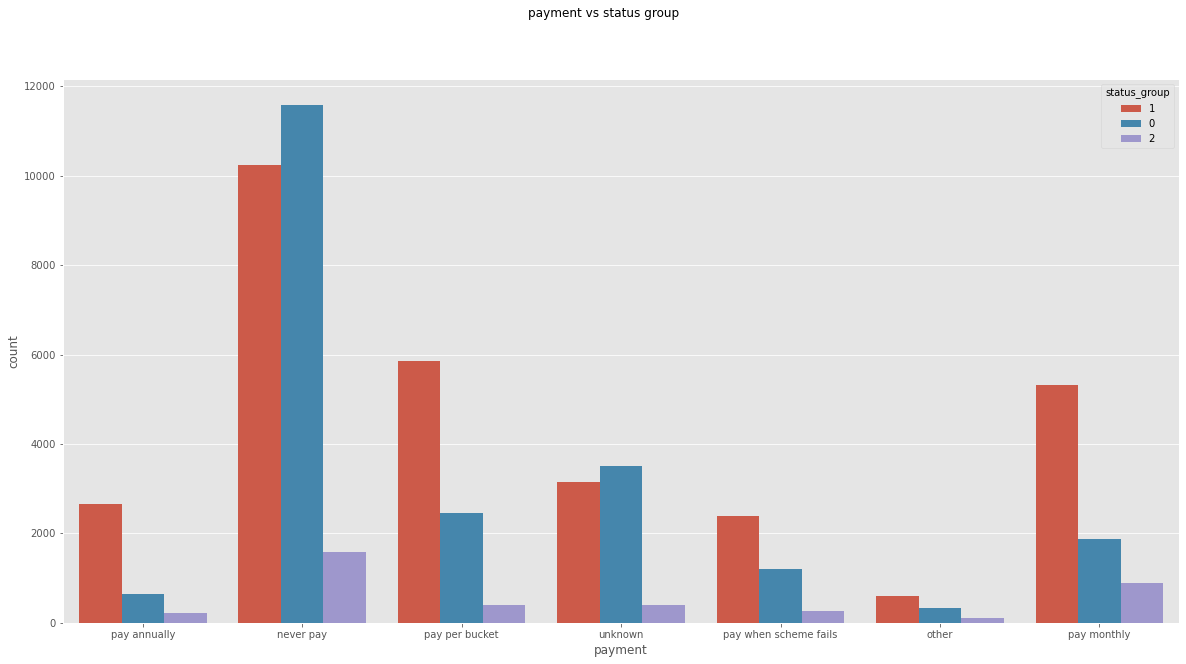

In [ ]:
# plotting the relationship between payment and status_group
plt.figure(figsize=(20,10))
sns.countplot(x='payment',hue="status_group", data=data)
plt.suptitle("payment vs status group")
plt.show()

#### Observations:
Most waterpoints that are not paid for are non functional.

Most waterpoints that are paid for are functional.

### What is the relationship between ``waterpoint_type`` and ``status_group``?

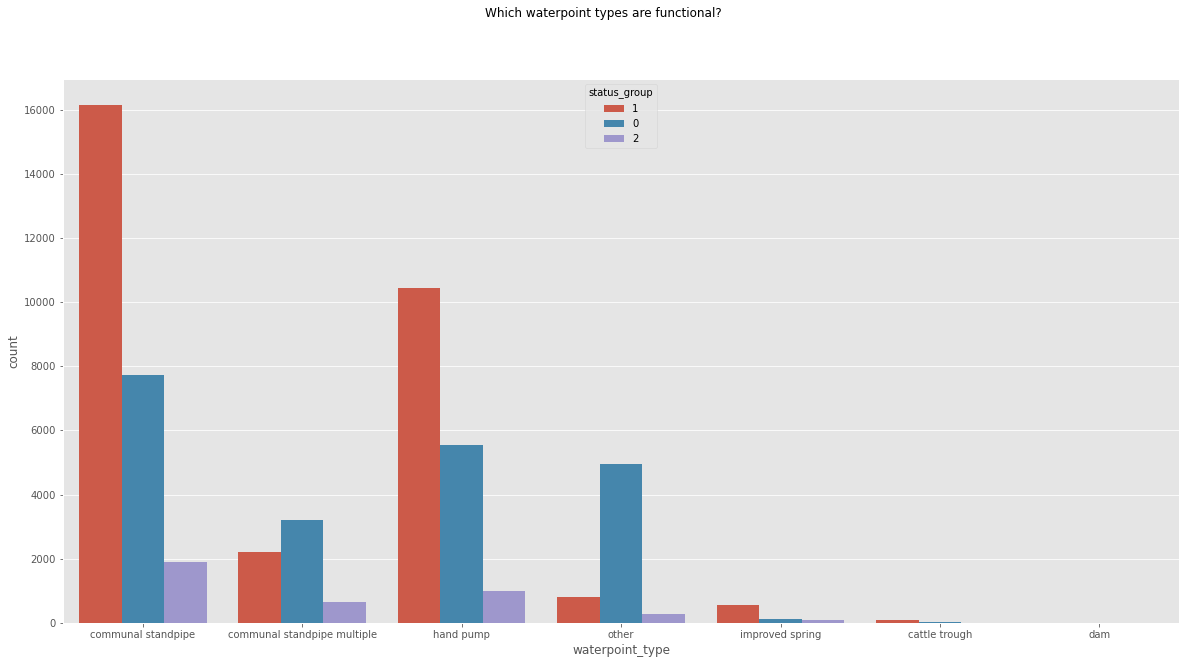

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='waterpoint_type', hue="status_group", data=data)
plt.suptitle("Which waterpoint types are functional?")
plt.show()

#### Observations
Most waterpoint types are functional, except communal standpipe multiple and other

For communal standpipe multiple, this may be due to the presence of many moving parts or complicated technology.

### What is the relationship between ``basin`` and ``status_group``?

In [ ]:
# Analysing basin based on the functionality of the wells
data["basin"].groupby(data['status_group']).value_counts()

status_group  basin                  
0             Lake Victoria              4093
              Pangani                    3063
              Lake Tanganyika            2574
              Wami / Ruvu                2562
              Ruvuma / Southern Coast    2494
              Rufiji                     2257
              Internal                   2185
              Lake Rukwa                 1181
              Lake Nyasa                 1180
1             Pangani                    5281
              Lake Victoria              4987
              Rufiji                     4653
              Internal                   3937
              Wami / Ruvu                3118
              Lake Tanganyika            3087
              Lake Nyasa                 2499
              Ruvuma / Southern Coast    1665
              Lake Rukwa                  999
2             Lake Victoria               967
              Lake Tanganyika             739
              Pangani                     

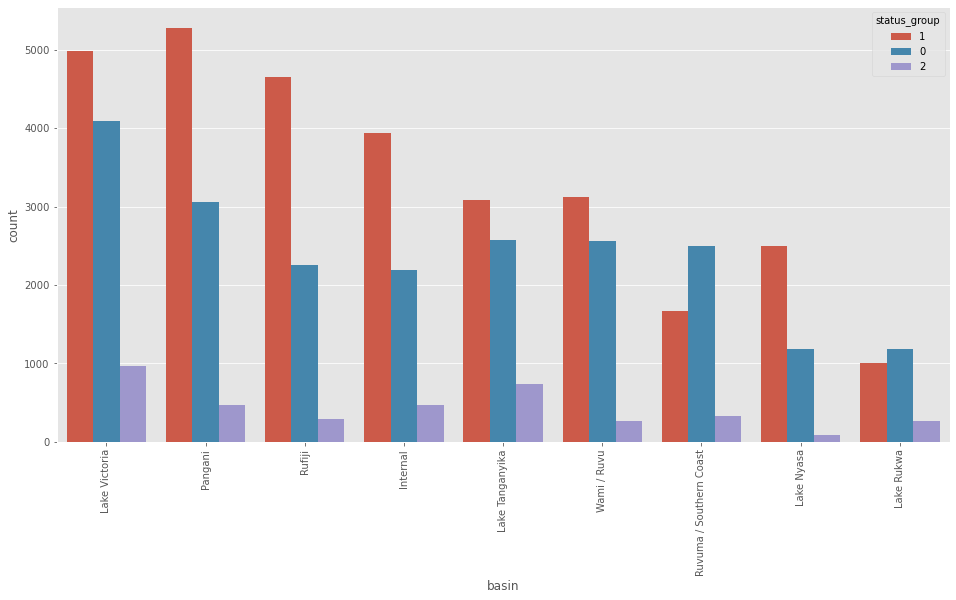

In [ ]:
# count of functional and non-functional wells based on the basin
fig = plt.subplots(figsize = (16,8))
sns.countplot(x= 'basin', hue= 'status_group', data= data, 
              order=data.basin.value_counts()\
              .index).set_xticklabels(data.basin.value_counts()
               .index,rotation=90);

#### observations
In accordance with the analysis, ``Lake Victoria`` basin has the largest number of well non functional wells and functional wells.

``Lake Nyasa`` basin has the lowest number of non functional wells.

``Lake Rukwa`` basin has the lowest number of funtional wells.

### What is the relationship between ``region`` and ``status_group``?

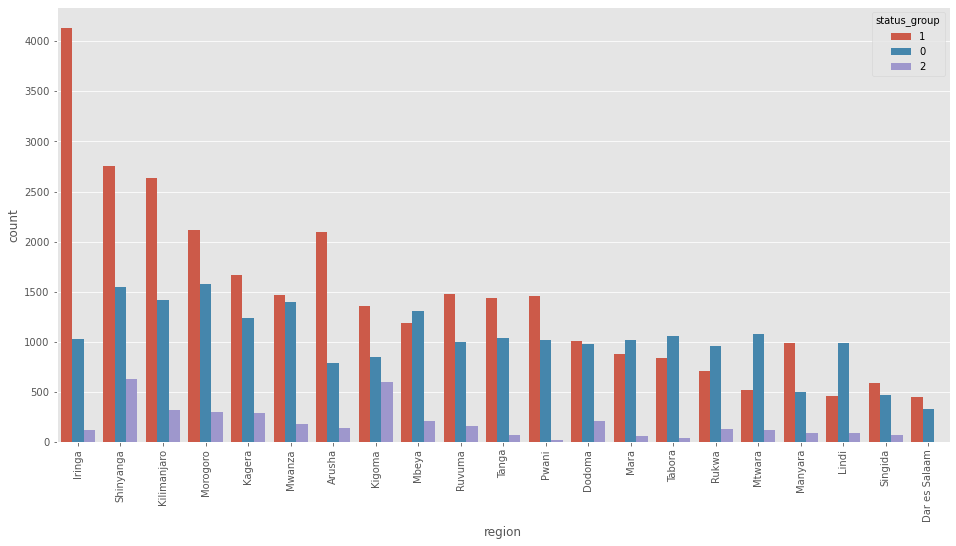

In [ ]:
# count of functional and non-functional wells based on the basin
fig = plt.subplots(figsize = (16,8))
sns.countplot(x= 'region', hue= 'status_group', data= data, 
              order=data.region.value_counts()\
              .index).set_xticklabels(data.region.value_counts()
               .index, rotation=90);

### What is the relationship between ``population`` and ``status_group``?

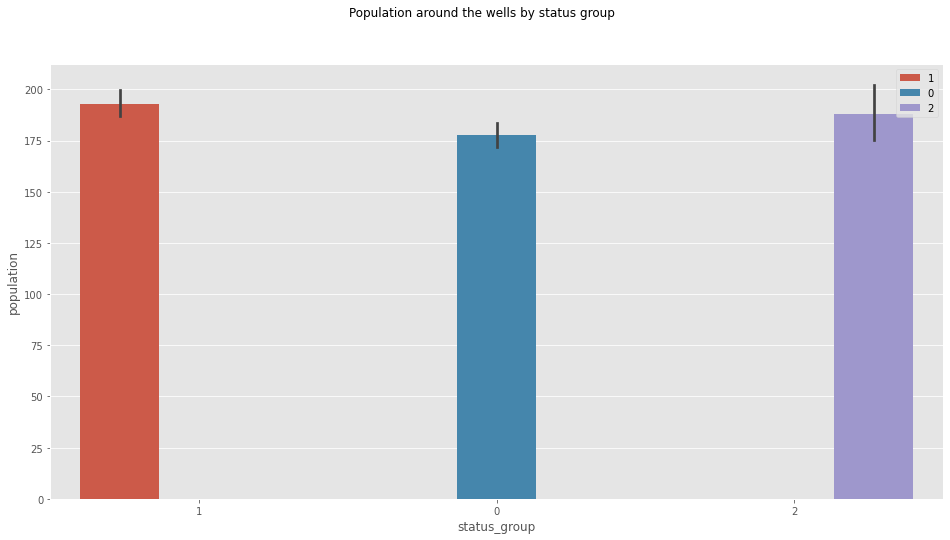

In [ ]:
# plotting the relationship between population and status group
plt.subplots(figsize = (16,8))
sns.barplot(data = data,x = 'status_group', y = 'population', hue = "status_group")
plt.suptitle("Population around the wells by status group")
plt.legend(loc='upper right')
plt.show();

#### observation
Functional wells seem to have more population around them generally than other status groups.

### What is the relationship between ``permit`` and ``status_group``?

In [ ]:
# Analysing if the functionality of the wells is affected by permit
data["permit"].groupby(data['status_group']).value_counts()

status_group  permit
0             True      14475
              False      7114
1             True      21298
              False      8928
2             True       2585
              False      1292
Name: permit, dtype: int64

Text(0.5, 0.98, 'Permit vs status group')

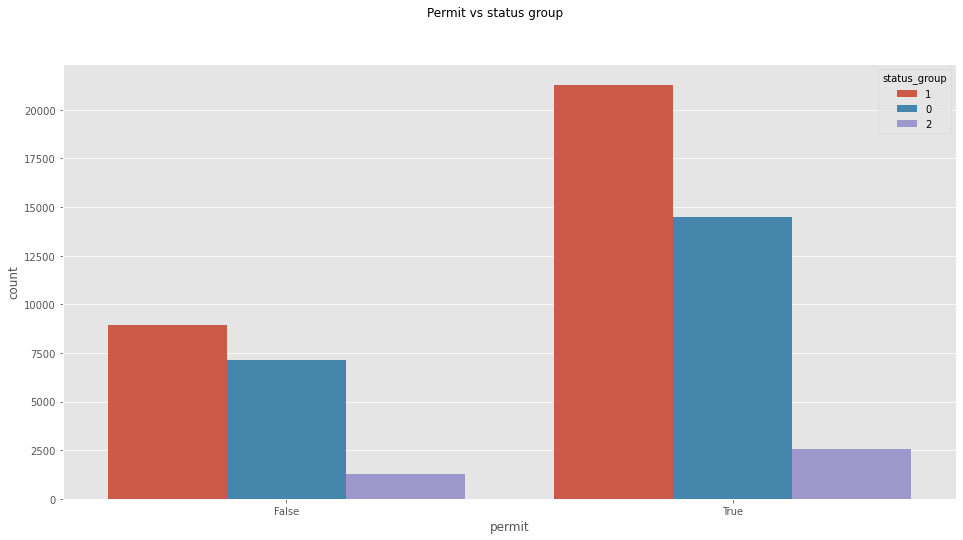

In [ ]:
# plotting permit by status group
plt.subplots(figsize = (16,8))
sns.countplot(x= 'permit', hue= 'status_group', data= data)
plt.suptitle("Permit vs status group")

#### observations
Most of the non functional wells have been given permission to exist.

Most of the functional wells have been given permission to exist

### What is the relationship between ``status_group`` and ``management_group``?

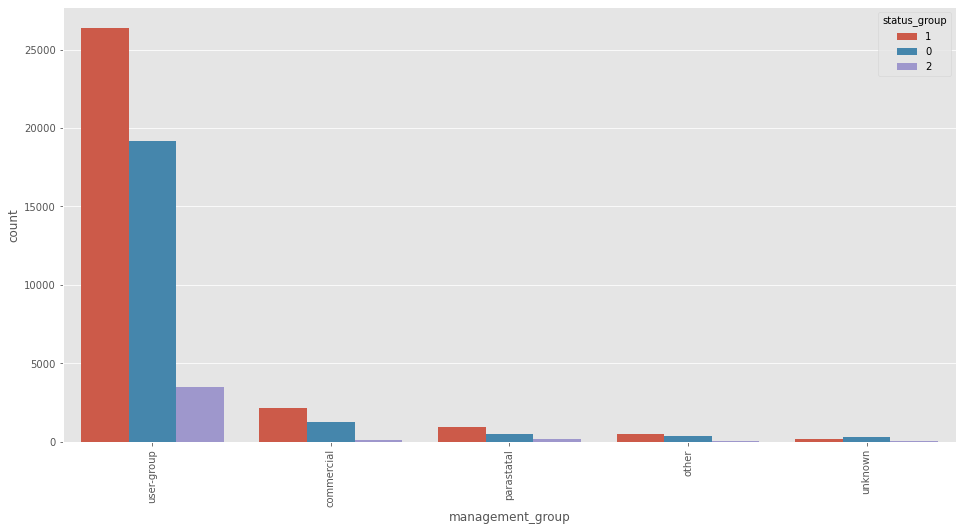

In [ ]:
# Visualise distribution of functional wells in management group
plt.figure(figsize=(16,8))
sns.countplot(x= 'management_group', 
              hue= 'status_group', 
              data= data, 
              order=data.management_group.value_counts().index)\
             .set_xticklabels(data.management_group.value_counts().index, rotation=90);


#### Observation
The data shows all mangement groups but unknown have a higher number of funtional wells than non-funtional wells

Water points with user group management have the highest number of both funtional and non-functional wells

### What is the relationship between ``status_group`` and ``quality_group``?

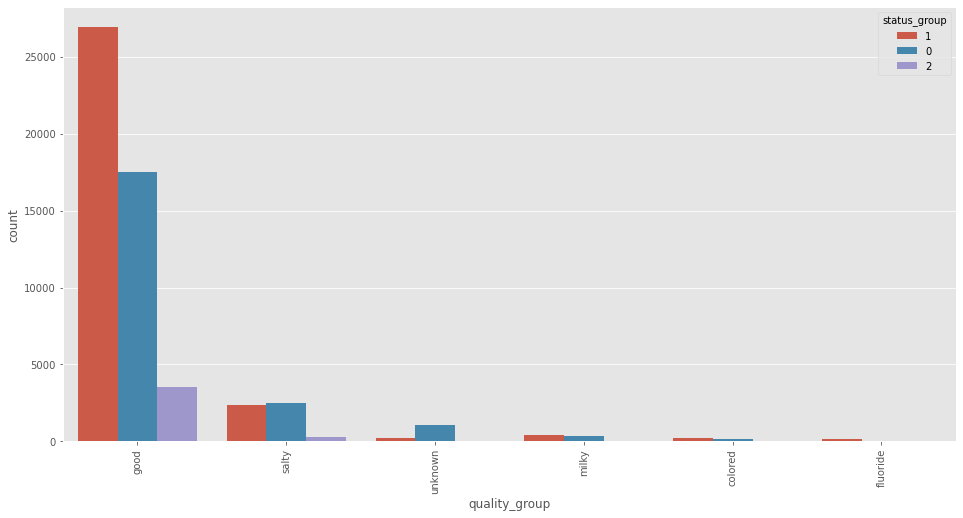

In [ ]:
# Visualise distribution of functional wells in quality groups
plt.figure(figsize=(16,8))
sns.countplot(x= 'quality_group', 
              hue= 'status_group', 
              data= data, 
              order=data.quality_group.value_counts()
               .index).set_xticklabels(data.quality_group.value_counts()
               .index, rotation=90);

#### Observation
From the analysis above we see that water points with good, salty, milky and colored quality water have a higher number of funtional water wells compared to non-funtional wells\
For water points with unknown and fluoride water quality the number of non-funtional water wells is higher than the number of functional wells

### What is the relationship between ``status_group`` and ``quantity``?

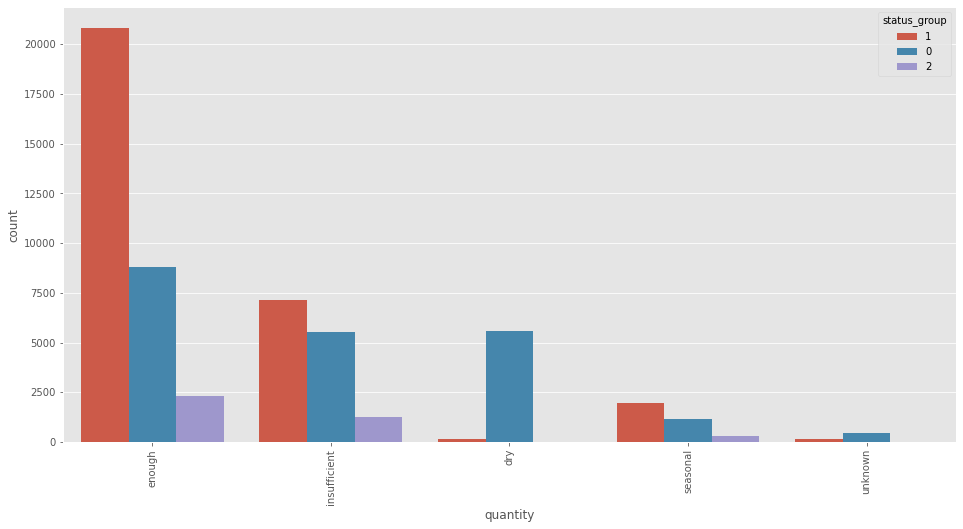

In [ ]:
# Visualise distribution of functional wells in quantity categories
plt.figure(figsize=(16,8))
sns.countplot(x= 'quantity', hue= 'status_group', data= data, order=data.quantity.value_counts()
               .index).set_xticklabels(data.quantity.value_counts()
               .index, rotation=90);

#### Observation
From the analysis above we see that water points with enough, insufficient and seasonal quantity categories have a higher number of funtional water water points compared to non-funtional waterpoints and those that need repair.
For water points with unknown and dry quantity categories the number of non-funtional water wells is higher than the number of functional wells.

#### What is the relationship between ``status_group`` and ``source_class``?

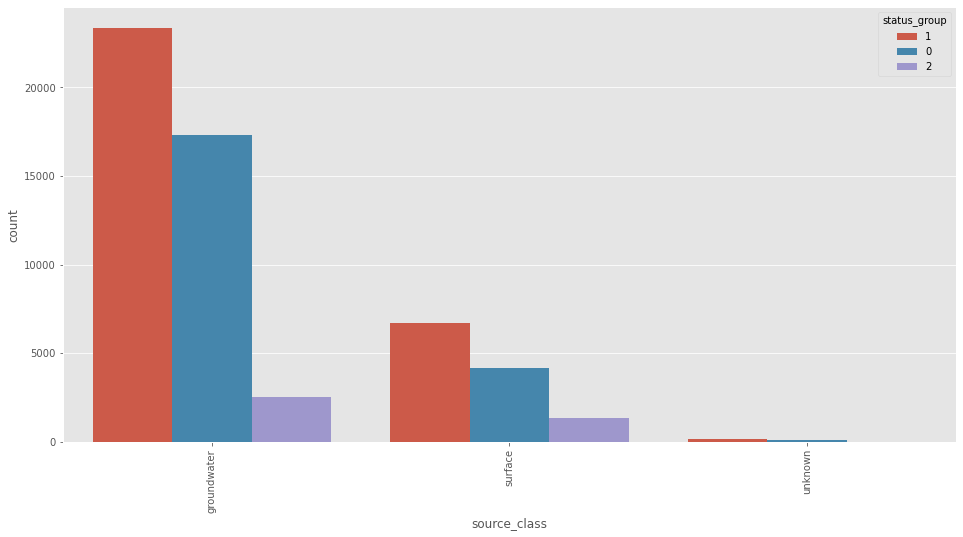

In [ ]:
# Visualise distribution of functional wells in source class
plt.figure(figsize=(16,8))
sns.countplot(x= 'source_class', hue= 'status_group', data= data, order=data.source_class.value_counts()
               .index).set_xticklabels(data.source_class.value_counts()
               .index, rotation=90);

#### Observation
The visualization shows that all the source classes have a higher number of funtional wells compared to non-funtional wells

## Multivariate Analysis

### What is the relationship between ``quantity`` vs ``amount_tsh`` with respect to ``source_class``

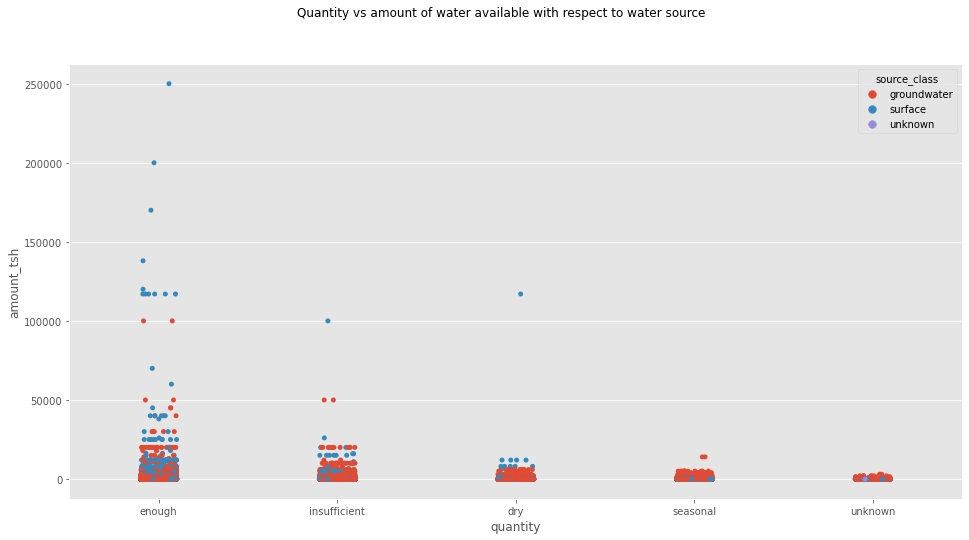

In [ ]:
# Plotting quantity vs amount with respect to source class
plt.figure(figsize = (16, 8))
sns.stripplot(x="quantity", y="amount_tsh",
              data=data, jitter=True,
              hue='source_class')
plt.suptitle("Quantity vs amount of water available with respect to water source")
plt.show()

#### Observations:
Enough water quantity has the largest amount of water available and most of it is surface water.

Most of the source class of the water point types is ground water.

For ground water to be at least 100,000 units of total static head, it must be of enough ``quantity`` 


### What is the relationship between ``amount_tsh``, ``extraction_type_class`` with respect to ``gps_height``?

<Figure size 1080x1080 with 0 Axes>

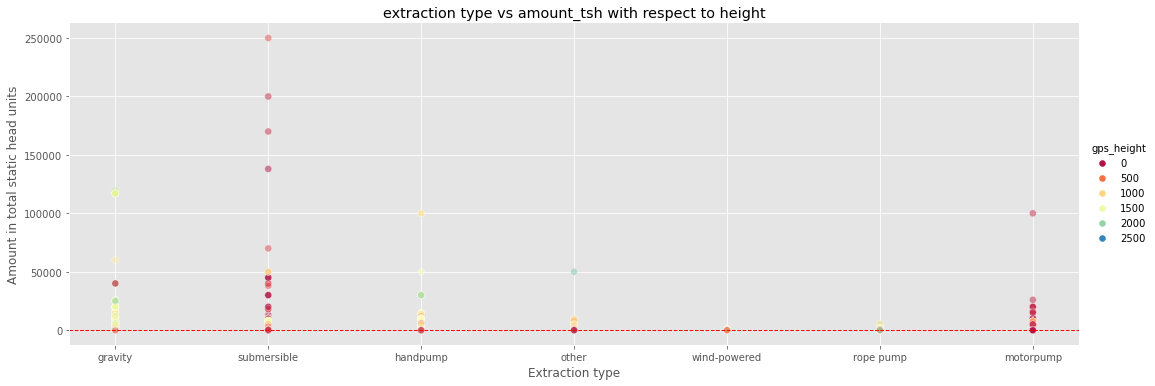

In [ ]:
# plotting extraction type vs amount wrt height
plt.figure(figsize = (15, 15))
sns.relplot(x = 'extraction_type_class',
            y = 'amount_tsh',
            hue = 'gps_height',
            data = data,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')
plt.axhline(data['amount_tsh'].median(),
           ls = '--', lw = 1, color = 'r')
plt.title('extraction type vs amount_tsh with respect to height')
plt.xlabel('Extraction type')
plt.ylabel('Amount in total static head units')
plt.show()

#### Observations:
For extraction type submersible has the most amount of water available in the data despite not registering some of the highest heights.

Motorpumps and submersible are generally located in low altitude areas, possibly because while there it is nearer to the water table than at a higher altitude.

For a handpump to have water available above the median amount of total static head, it needs to be above a height of 500 meters above sea level

Wind powered and rope pump have the least amount of water available.


#### What is the relationship between ``extraction_type_class`` and ``population`` with respect to ``waterpoint_type``?

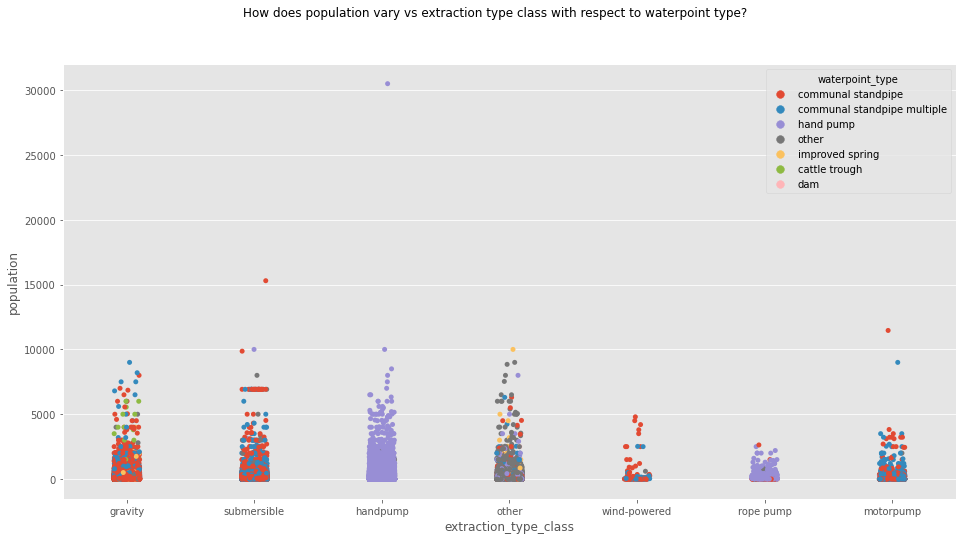

In [ ]:
#plotting the relationship between extraction type class and population wrt waterpoint type
plt.figure(figsize = (16, 8))
sns.stripplot(x="extraction_type_class", y="population", 
              data=data, 
              jitter=True,
              hue='waterpoint_type', )
plt.suptitle("How does population vary vs extraction type class with respect to waterpoint type?")
plt.show()

#### Observation
The visualization shows that for waterpoints that extract water through gravity, submersible, wind-powered and motorpump the two main waterpoint types are communal standpipe and communal standpipe population. They apply a bit of technology than the rest



### What is the relationship betweeen ``quality_group`` and ``amount_tsh`` with respect to ``permit``?

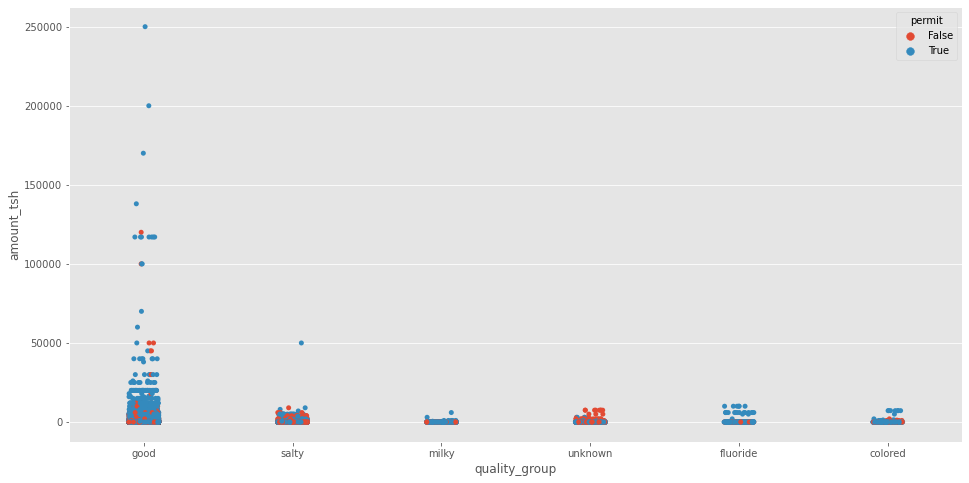

In [ ]:
# plotting the relationship between quality group and amount with respect to permit?
plt.figure(figsize = (16, 8))
sns.stripplot(x="quality_group", 
              y="amount_tsh", 
              data=data, 
              jitter=True,hue='permit')
plt.show()

#### Observation
The visualization shows that water points that produce good quality water have the highest amount of waterwith most of the water points being functional.

Milky quality have the least amount of water available.

In [ ]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1IjoiZWtpcGxpbW8iLCJhIjoiY2w5bnZpbTA0MGE4bjNubzUyZ21lNXlpeSJ9.m78LT720SnDOzb6irRQzqA")
fig = px.scatter_mapbox(data, lat="latitude", lon="longitude",color="status_group", size="population",
                   size_max=20,zoom=10)
fig.show()

#### Observation:
From the inforgraphic above, we can deduce that most of the wells in Tanzania have non functional wells with the central part of the nation not densely populated.

Close to the large water bodies, most wells are non functional. This may probably be a reason why most wells are not maintained.

# Conclusion
The entity that funds most of the waterpoints going by the analysis is the Government of Tanzania and they are also the second most installers of the waterpoints thus it makes sense that they are the chosen stakeholders for this investigation.

Communal standpipe seems to be the most popular waterpoint type.

Most water points that are not paid for are non functional.

Most water points that are paid for are functional.

Dry water points have more non functional wells than functional wells.

Most of Communal stand pipe multiple are non-functional. This may be due to many moving parts that may cause a higher risk of damage.

Enough water quantity has the largest amount of water available and most of it is surface water.,

Most of the source class of the water point types is ground water.

For ground water to be at least 100,000 units of total static head, it must be of enough ``quantity`` 

For extraction type submersible has the most amount of water available in the data despite not registering some of the highest heights.

Motorpumps and submersible are generally located in low altitude areas, possibly because while there it is nearer to the water table than at a higher altitude.

For a handpump to have water available above the median amount of total static head, it needs to be above a height of 500 meters above sea level

Wind powered and rope pump have the least amount of water available.

The visualization shows that for waterpoints that extract water through gravity, submersible, wind-powered and motorpump the two main waterpoint types are communal standpipe and communal standpipe population. They apply a bit of technology than the rest.

The visualization shows that water points that produce good quality water have the highest amount of water with most of the water points being functional.

Milky quality have the least amount of water available.

From the inforgraphic above, we can deduce that most of the wells in Tanzania have non functional wells with the central part of the nation not densely populated.

Close to the large water bodies, most wells are non functional. This may probably be a reason why most wells are not maintained.


# Recommendation

Investments should be channeled towards communal standpipe and not communal standpipe multiple because most of them are non functional.

The government should not allow 'The Tragedy of commons' since it clearly affects the functionality of water points. This is shown by the fact that water points that are never paid for are non functional. This may be due to the fact that nobody takes responsibility for them to ensure proper care of the water point thus they get easily damaged.

The central parts of the country do not have enough wells, probably because of the lower population in those areas but the government should ensure that water is enough for those who live around there.

